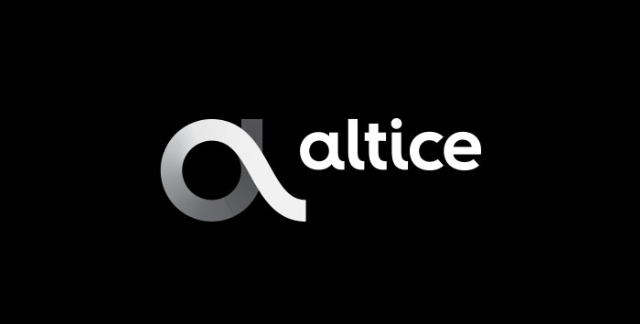

## Análise Exploratória de Dados

- Carregamento dos dados

- Resumo estatístico geral

- Verificação de valores ausentes

- Distribuição de clientes por cidade

- Análise dos valores dos produtos

- Distribuição temporal das assinaturas

- Visualizações gráficas para insights

## Dados gerados 


Estrutura dos Dados:

- Cada linha do CSV contém as seguintes colunas:

- ClienteID: Identificador único do cliente.

- Nome: Nome do cliente (sintético, ex.: Cliente_1, Cliente_2, ...).

- Cidade: Cidade do cliente (distribuídas entre as cidades informadas).

- Produto: Produto ou serviço contratado (ex.: Internet 100 Mbps, Pacote TV HD, etc.).

- Valor_Euro: Valor do produto/serviço em euros (gerado aleatoriamente dentro da faixa definida para cada produto).

- Data_Assinatura: Data de assinatura do contrato (aleatória entre 2018 e 2023).


In [15]:
#importação das bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv(r"C:\Users\alexm\Documents\Altice_DataAnalyst\clientes_altice.csv")

# Exibir as primeiras linhas do dataset
df.head()

,ClienteID,Nome,Cidade,Produto,Valor_Euro,Data_Assinatura
0,6253,Cliente_6253,Cascais,Pacote TV HD,26.66,2018-03-23
1,4685,Cliente_4685,Braga,Net segura,174.31,2020-04-18
2,1732,Cliente_1732,Lisboa,Pacote TV HD,29.81,2020-02-28
3,4743,Cliente_4743,Coimbra,Telefone Fixo Ilimitado,25.40,2023-07-11
4,4522,Cliente_4522,Braga,Internet 100 Mbps,36.46,2023-01-23


In [16]:
#número de linhas e colunas de um DataFrame, você pode usar:
print("Linhas:", df.shape[0])
print("Colunas:", df.shape[1])

Linhas: 10000
Colunas: 6


In [17]:
# Resumo estatístico das colunas numéricas
df.describe()

,ClienteID,Valor_Euro
count,10000.00000,10000.000000
mean,5000.50000,105.556973
std,2886.89568,114.160461
min,1.00000,15.000000
25%,2500.75000,28.520000
50%,5000.50000,49.560000
75%,7500.25000,138.277500
max,10000.00000,499.740000


# Análise Estatística dos Dados

O comando `df.describe()` é utilizado para gerar um resumo estatístico das colunas numéricas de um DataFrame. Ele fornece métricas como contagem, média, desvio padrão, valores mínimos e máximos, e quartis, que são essenciais para entender a distribuição dos dados.

## Interpretação dos Dados

### Coluna `ClientelD`
- **Média**: 5.000,5
  - A média dos valores de `ClientelD` é 5.000,5, indicando que os valores estão distribuídos em torno desse ponto central.
- **Desvio Padrão**: 2.886,9
  - O alto desvio padrão sugere uma dispersão significativa dos valores em torno da média.
- **Mediana**: 5.000,5
  - A mediana coincide com a média, indicando uma distribuição simétrica.
- **Quartis**:
  - 25% dos valores estão abaixo de 2.500,75.
  - 75% dos valores estão abaixo de 7.500,25.
- **Valores Extremos**:
  - O valor mínimo é 1, e o máximo é 10.000.

### Coluna `Valor_Euro`
- **Média**: 105,56 euros
  - A média dos valores de `Valor_Euro` é 105,56 euros.
- **Desvio Padrão**: 114,16 euros
  - O desvio padrão relativamente alto indica uma dispersão considerável dos valores.
- **Mediana**: 49,56 euros
  - A mediana é significativamente menor que a média, sugerindo uma assimetria à direita (valores mais altos puxam a média para cima).
- **Quartis**:
  - 25% dos valores estão abaixo de 28,52 euros.
  - 75% dos valores estão abaixo de 138,28 euros.
- **Valores Extremos**:
  - O valor mínimo é 15 euros, e o máximo é 499,74 euros.

## Conclusão
A análise estatística revela que:
- A coluna `ClientelD` tem uma distribuição simétrica, com valores distribuídos uniformemente entre 1 e 10.000.
- A coluna `Valor_Euro` apresenta uma distribuição assimétrica à direita, com alguns valores significativamente mais altos que a maioria, o que é evidenciado pela diferença entre a média e a mediana.

Essas métricas são fundamentais para entender a distribuição dos dados e tomar decisões informadas em análises subsequentes.

C:\Users\alexm\AppData\Local\Temp\ipykernel_22816\3927155309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")


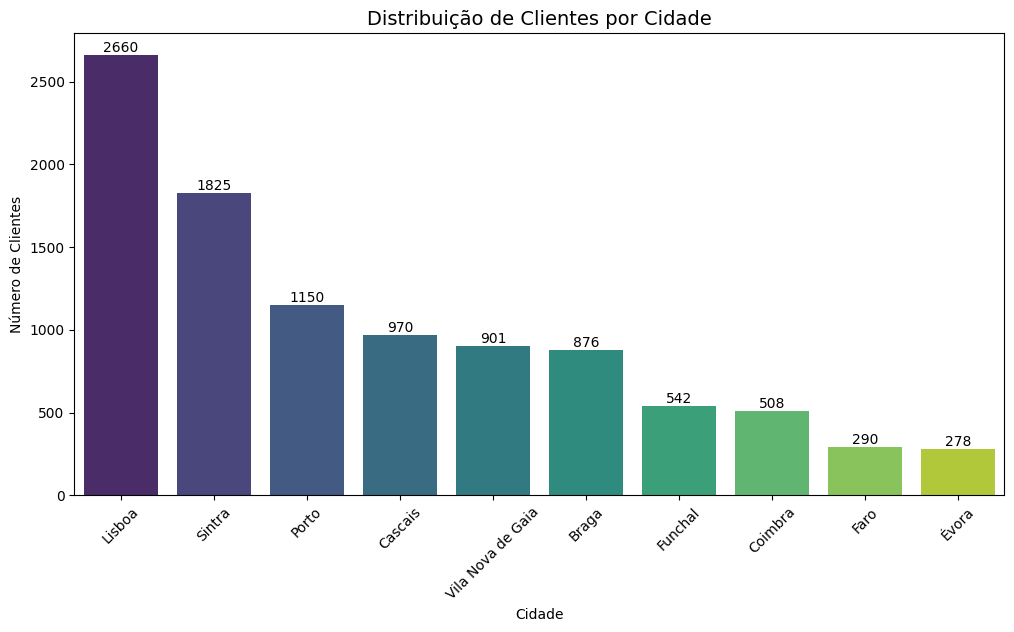

In [18]:
# Contagem de clientes por cidade
city_counts = df["Cidade"].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribuição de Clientes por Cidade", fontsize=14)
plt.xlabel("Cidade")
plt.ylabel("Número de Clientes")

# Adiciona os rótulos em cima das barras
for index, value in enumerate(city_counts.values):
    plt.text(index, value, str(value), color='black', ha="center", va="bottom")

plt.show()

C:\Users\alexm\AppData\Local\Temp\ipykernel_22816\4214160206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Produto", y="Valor_Euro", data=df, palette="coolwarm")


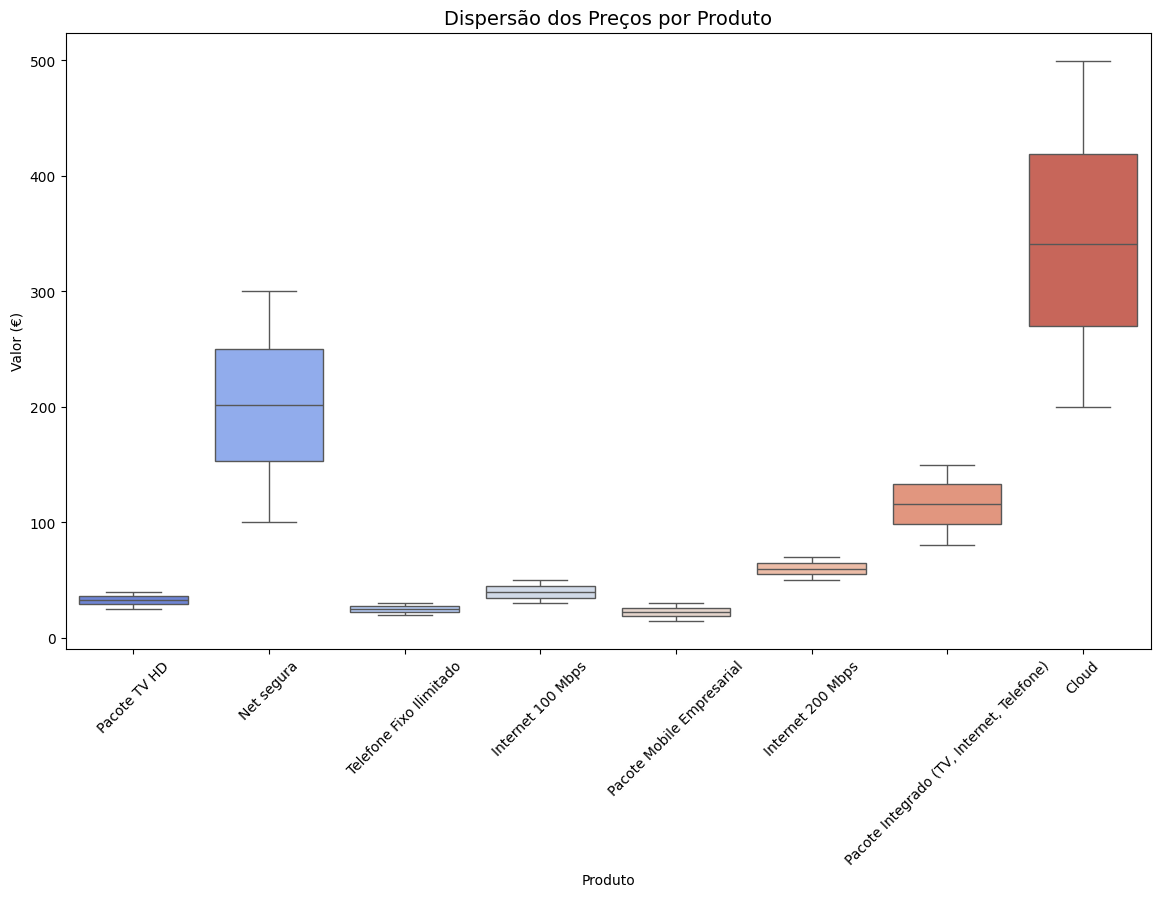

In [22]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Produto", y="Valor_Euro", data=df, palette="coolwarm")
plt.title("Dispersão dos Preços por Produto", fontsize=14)
plt.xlabel("Produto")
plt.ylabel("Valor (€)")
plt.xticks(rotation=45)
plt.show()


## Análise do Gráfico de Dispersão: Valores em Euros ao Longo do Tempo

## Tendência Geral:

Observamos um aumento gradual nos valores ao longo de 2018, sugerindo crescimento nas vendas ou aumento nos custos.

## Sazonalidade:

Há picos consistentes nos meses de junho e dezembro, possivelmente relacionados a promoções de meio do ano e festas de fim de ano.

## Dispersão dos Valores:

A dispersão dos pontos é relativamente alta, indicando que os valores variam significativamente ao longo do tempo. Isso pode ser um sinal de instabilidade nos preços ou na demanda.

## Outliers:

Identificamos alguns valores extremamente altos em março e setembro. Esses outliers podem representar oportunidades de vendas excepcionais ou problemas de precificação.

## Recomendações:

Aproveitar a sazonalidade: Planejar campanhas de marketing e estoques para os períodos de pico.

Investigar a alta dispersão: Analisar as causas da variabilidade nos valores e tomar medidas para estabilizá-los.

Avaliar outliers: Investigar os valores extremos para identificar oportunidades ou corrigir problemas.